<a href="https://colab.research.google.com/github/Minh-A/Pytorch_DeepLearning/blob/main/LSTM_pytorch_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
torch.manual_seed(1015) ###### <- 이거 뭐냐?(랜덤시드 같은 것)

# define 'device' to upload tensor in gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#시간을 계산하는 함수
import time, datetime
def clock(start):
    sec = time.time() - start #현재시간 - 시스템초기시간
    times = str(datetime.timedelta(seconds = sec)).split(".") # 시간:분:초로 변환
    times = times[0]
    return times

# Data Load

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LSTM_pytorch(Dacon)/input/train.csv", encoding = 'euc-kr')
train['DateTime'] = pd.to_datetime(train.DateTime)  # 데이터 타입을 object에서 datetime으로
train['date'] = train.DateTime.dt.date  # 날짜만 뽑음
train  = train.groupby('date').sum().reset_index()  # 날짜별로 묶음

In [4]:
train

,date,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,281,266,73,1826
1,2018-09-10,264,247,51,2092
2,2018-09-11,329,310,58,1998
3,2018-09-12,300,287,45,2595
4,2018-09-13,378,344,50,3845
...,...,...,...,...,...
787,2020-11-04,4516,4472,1196,112683
788,2020-11-05,4155,4037,1044,102901
789,2020-11-06,3663,3576,825,88015
790,2020-11-07,2472,2417,531,57386


In [5]:
792/30

26.4

In [ ]:
train['date']

0      2018-09-09
1      2018-09-10
2      2018-09-11
3      2018-09-12
4      2018-09-13
          ...    
787    2020-11-04
788    2020-11-05
789    2020-11-06
790    2020-11-07
791    2020-11-08
Name: date, Length: 792, dtype: object

# 데이터 불러오기

In [109]:
# 그냥 한번
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LSTM_pytorch(Dacon)/input/train.csv", encoding = 'euc-kr')
train['DateTime'] = pd.to_datetime(train.DateTime)  # 데이터 타입을 object에서 datetime으로

In [110]:
train

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18
...,...,...,...,...,...
19003,2020-11-08 19:00:00,124,123,19,3128
19004,2020-11-08 20:00:00,166,159,29,4864
19005,2020-11-08 21:00:00,184,173,32,3426
19006,2020-11-08 22:00:00,163,155,34,2845


In [ ]:
train['date'] = pd.to_datetime(train['date'])

In [ ]:
train['YearMonth'] = train['date'].dt.to_period('M')
year_month = train.groupby('YearMonth').mean().reset_index()

In [ ]:
year_month.head()

,YearMonth,사용자,세션,신규방문자,페이지뷰
0,2018-09,226.409091,213.409091,47.227273,1615.590909
1,2018-10,149.129032,148.774194,53.064516,909.645161
2,2018-11,222.233333,226.066667,84.033333,1704.900000
3,2018-12,236.161290,234.064516,63.774194,2245.741935
4,2019-01,302.387097,300.870968,84.032258,2434.612903


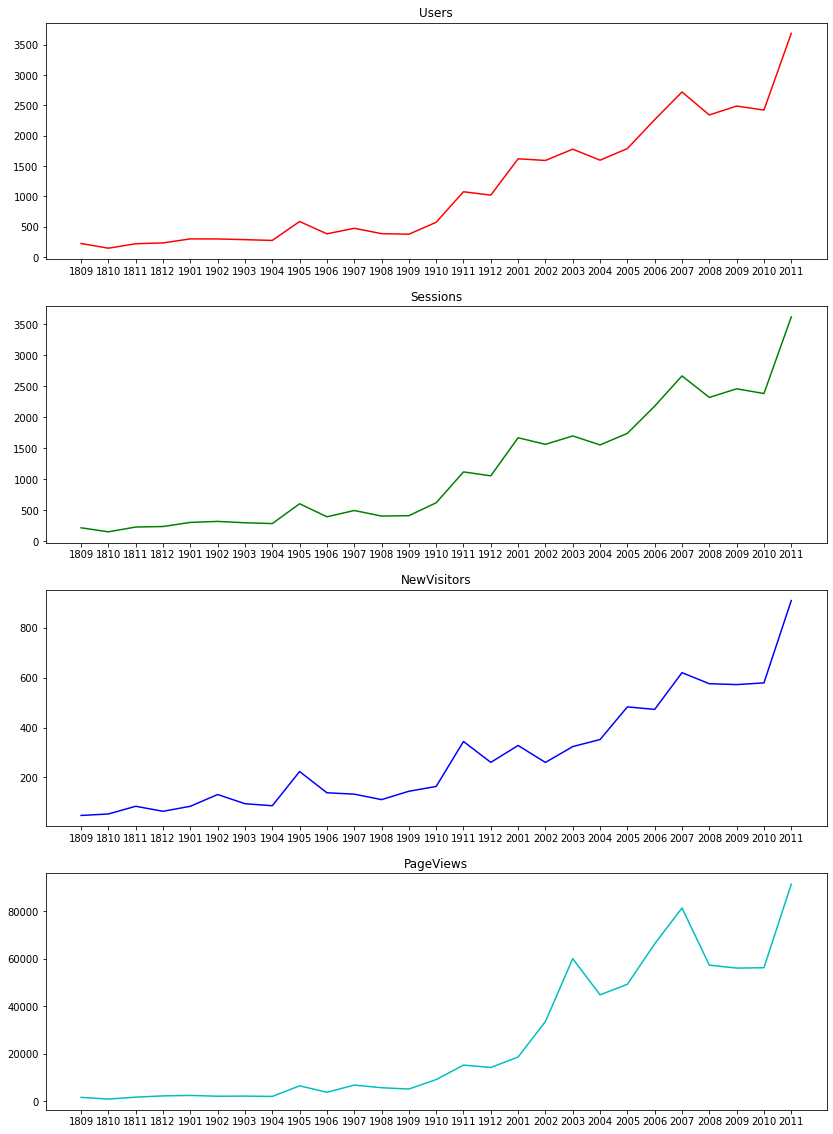

In [ ]:
#시각화
import os.path
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(14, 20))
axes[0].plot(year_month['YearMonth'].dt.strftime('%y%m'), year_month['사용자'], 'r')
axes[1].plot(year_month['YearMonth'].dt.strftime('%y%m'), year_month['세션'], 'g')
axes[2].plot(year_month['YearMonth'].dt.strftime('%y%m'), year_month['신규방문자'], 'b')
axes[3].plot(year_month['YearMonth'].dt.strftime('%y%m'), year_month['페이지뷰'], 'c')

for i, title in enumerate(['Users', 'Sessions', 'NewVisitors', 'PageViews']):
    axes[i].set_title(title)
plt.show()

In [ ]:
#시각화
import os.path
import pandas as pd
import matplotlib.pyplot as plt


train.iloc[:,2].plot

In [ ]:
train

,date,사용자,세션,신규방문자,페이지뷰,YearMonth
0,2018-09-09,281,266,73,1826,2018-09
1,2018-09-10,264,247,51,2092,2018-09
2,2018-09-11,329,310,58,1998,2018-09
3,2018-09-12,300,287,45,2595,2018-09
4,2018-09-13,378,344,50,3845,2018-09
...,...,...,...,...,...,...
787,2020-11-04,4516,4472,1196,112683,2020-11
788,2020-11-05,4155,4037,1044,102901,2020-11
789,2020-11-06,3663,3576,825,88015,2020-11
790,2020-11-07,2472,2417,531,57386,2020-11


In [ ]:
train['date'] = pd.to_datetime(train['date'])

In [ ]:
train['YearMonth'] = train['date'].dt.to_period('D')
year_month = train.groupby('YearMonth').mean().reset_index()

In [ ]:
year_month

,YearMonth,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,281,266,73,1826
1,2018-09-10,264,247,51,2092
2,2018-09-11,329,310,58,1998
3,2018-09-12,300,287,45,2595
4,2018-09-13,378,344,50,3845
...,...,...,...,...,...
787,2020-11-04,4516,4472,1196,112683
788,2020-11-05,4155,4037,1044,102901
789,2020-11-06,3663,3576,825,88015
790,2020-11-07,2472,2417,531,57386


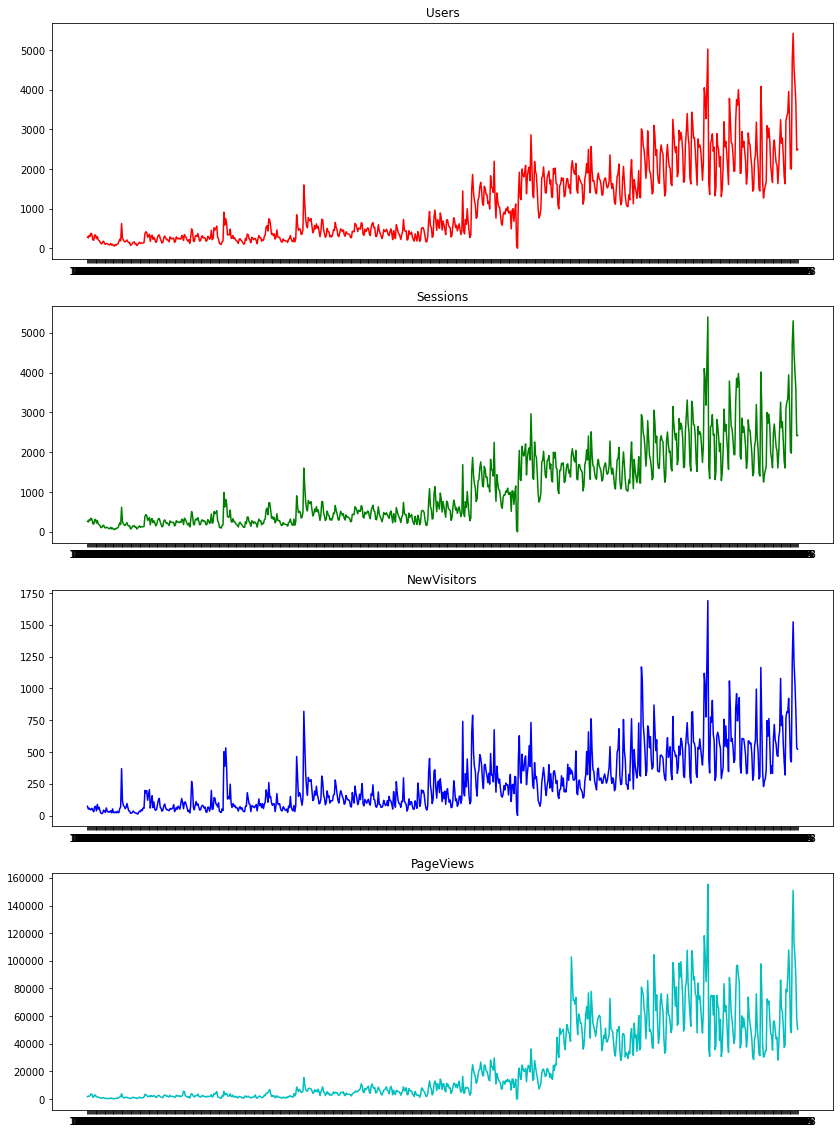

In [ ]:
#시각화
import os.path
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(14, 20))
axes[0].plot(train['YearMonth'].dt.strftime('%y%m%d'), train['사용자'], 'r')
axes[1].plot(train['YearMonth'].dt.strftime('%y%m%d'), train['세션'], 'g')
axes[2].plot(train['YearMonth'].dt.strftime('%y%m%d'), train['신규방문자'], 'b')
axes[3].plot(train['YearMonth'].dt.strftime('%y%m%d'), train['페이지뷰'], 'c')

for i, title in enumerate(['Users', 'Sessions', 'NewVisitors', 'PageViews']):
    axes[i].set_title(title)
plt.show()

In [ ]:
train

,DateTime,사용자,세션,신규방문자,페이지뷰,Hour,WeekDay
0,2018-09-09 00:00:00,19,19,8,206,0,6
1,2018-09-09 01:00:00,20,19,9,259,1,6
2,2018-09-09 02:00:00,12,9,1,48,2,6
3,2018-09-09 03:00:00,10,10,2,102,3,6
4,2018-09-09 04:00:00,6,5,3,18,4,6
...,...,...,...,...,...,...,...
19003,2020-11-08 19:00:00,124,123,19,3128,19,6
19004,2020-11-08 20:00:00,166,159,29,4864,20,6
19005,2020-11-08 21:00:00,184,173,32,3426,21,6
19006,2020-11-08 22:00:00,163,155,34,2845,22,6


In [ ]:
train['DateTime'] = pd.to_datetime(train['DateTime'])

In [ ]:
#시각화
import os.path
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train['DateTime'].dt.day

0        9
1        9
2        9
3        9
4        9
        ..
19003    8
19004    8
19005    8
19006    8
19007    8
Name: DateTime, Length: 19008, dtype: int64

In [ ]:
categories = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
train['WeekDay'] = train['DateTime'].dt.day_name()
week_day = train.groupby('WeekDay').mean().reindex(categories).reset_index()
week_day

,WeekDay,사용자,세션,신규방문자,페이지뷰,Hour
0,Sunday,NaN,NaN,NaN,NaN,NaN
1,Monday,NaN,NaN,NaN,NaN,NaN
2,Tuesday,NaN,NaN,NaN,NaN,NaN
3,Wednesday,NaN,NaN,NaN,NaN,NaN
4,Thursday,NaN,NaN,NaN,NaN,NaN
5,Friday,NaN,NaN,NaN,NaN,NaN
6,Saturday,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.5)


In [14]:
train.describe()

,사용자,세션,신규방문자,페이지뷰
count,19008.000000,19008.000000,19008.000000,19008.000000
mean,45.633944,45.280356,11.169613,1009.841435
std,55.111373,54.534009,15.108557,1588.200273
min,0.000000,0.000000,0.000000,0.000000
25%,9.000000,9.000000,2.000000,69.000000
50%,21.000000,21.000000,6.000000,270.000000
75%,70.000000,70.000000,15.000000,1277.000000
max,668.000000,815.000000,335.000000,27884.000000


In [80]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LSTM_pytorch(Dacon)/input/train.csv", encoding = 'euc-kr')

In [60]:
train

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18
...,...,...,...,...,...
19003,2020-11-08 19:00:00,124,123,19,3128
19004,2020-11-08 20:00:00,166,159,29,4864
19005,2020-11-08 21:00:00,184,173,32,3426
19006,2020-11-08 22:00:00,163,155,34,2845


792일이 존재

In [ ]:
train['Hour'] = train['DateTime'].dt.hour
hour = train.groupby('Hour').mean().reset_index()
hour

,Hour,사용자,세션,신규방문자,페이지뷰,WeekDay
0,0,46.270202,50.710859,10.125000,1064.257576,3.003788
1,1,29.064394,27.231061,6.170455,623.564394,3.003788
2,2,18.179293,17.118687,3.853535,379.474747,3.003788
3,3,11.486111,10.780303,2.606061,236.808081,3.003788
4,4,7.443182,7.023990,1.827020,141.917929,3.003788
5,5,5.949495,5.787879,1.583333,107.553030,3.003788
6,6,7.066919,7.011364,2.066919,108.974747,3.003788
7,7,12.013889,12.166667,3.362374,174.809343,3.003788
8,8,24.150253,24.806818,6.857323,381.575758,3.003788
9,9,44.409091,45.780303,12.150253,860.137626,3.003788


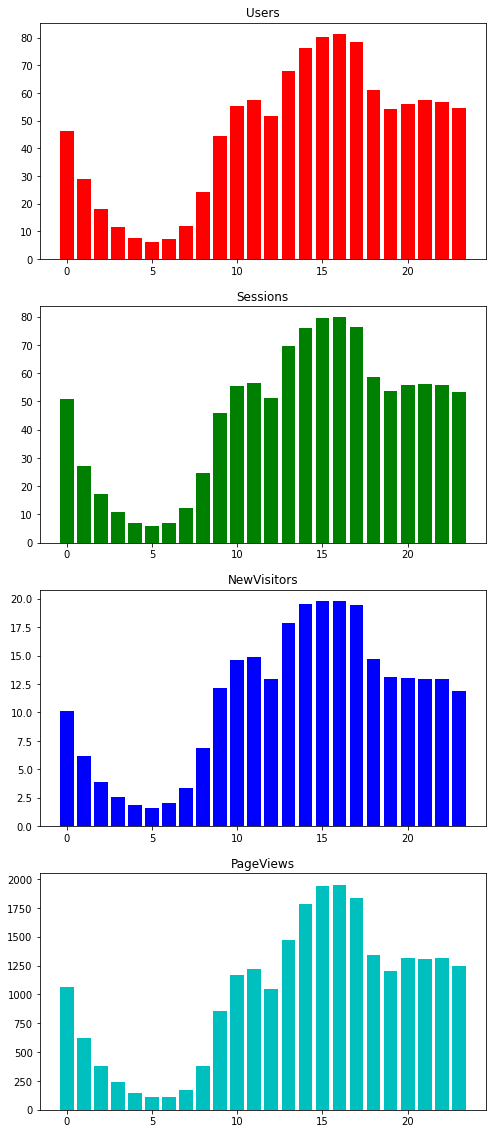

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(8, 20))
axes[0].bar(hour['Hour'], hour['사용자'], color='r')
axes[1].bar(hour['Hour'], hour['세션'], color='g')
axes[2].bar(hour['Hour'], hour['신규방문자'], color='b')
axes[3].bar(hour['Hour'], hour['페이지뷰'], color='c')
for i, title in enumerate(['Users', 'Sessions', 'NewVisitors', 'PageViews']):
    axes[i].set_title(title)
plt.show()

# Data Preprocessing

In [35]:
train.shape

(19008, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler

#iloc만 해도 데이터 셋 자체가 바뀌어짐
# 표준화
mini = train.iloc[:,1:].min()
size = train.iloc[:,1:].max() - train.iloc[:,1:].min()

train.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(train.iloc[:,1:])
train.iloc[:,1:] = scaler.transform(train.iloc[:,1:])
train.iloc[:,1:].shape

(792, 4)

In [ ]:
train

,date,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,-0.831585,-0.854682,-0.808095,-0.786990
1,2018-09-10,-0.848948,-0.874468,-0.899232,-0.777649
2,2018-09-11,-0.782561,-0.808862,-0.870234,-0.780950
3,2018-09-12,-0.812180,-0.832813,-0.924087,-0.759985
4,2018-09-13,-0.732516,-0.773455,-0.903374,-0.716088
...,...,...,...,...,...
787,2020-11-04,3.493765,3.525320,3.844017,3.106030
788,2020-11-05,3.125064,3.072324,3.214345,2.762511
789,2020-11-06,2.622567,2.592253,2.307121,2.239752
790,2020-11-07,1.406158,1.385305,1.089204,1.164138


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 정규화
mini = train.iloc[:,1:].min()
size = train.iloc[:,1:].max() - train.iloc[:,1:].min()


train.iloc[:,1:]
transformer = MinMaxScaler()
transformer.fit(train.iloc[:,1:])
train.iloc[:,1:] = transformer.transform(train.iloc[:,1:])

In [ ]:
train

,date,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,0.051689,0.049083,0.042604,0.011735
1,2018-09-10,0.048551,0.045564,0.029586,0.013446
2,2018-09-11,0.060550,0.057233,0.033728,0.012842
3,2018-09-12,0.055197,0.052973,0.026036,0.016682
4,2018-09-13,0.069596,0.063530,0.028994,0.024724
...,...,...,...,...,...
787,2020-11-04,0.833487,0.828116,0.707101,0.724949
788,2020-11-05,0.766845,0.747546,0.617160,0.662015
789,2020-11-06,0.676020,0.662160,0.487574,0.566244
790,2020-11-07,0.456157,0.447490,0.313609,0.369188


In [ ]:
# 전체 텐서 만들기
input_window = 24
output_window = 7

window_x = np.zeros((train.shape[0] - (input_window + output_window), input_window, 4))
window_y = np.zeros((train.shape[0] - (input_window + output_window), output_window, 4))

for start in range(train.shape[0] - (input_window + output_window)):
    end = start + input_window    
    window_x[start,:, :] = train.iloc[start : end                , 1: ].values
    window_y[start,:, :] = train.iloc[end   : end + output_window, 1: ].values

In [ ]:
print(window_x.shape)
print(window_y.shape)

torch.Size([755, 30, 4])
torch.Size([755, 7, 4])


In [ ]:
input_window = 30
output_window = 7

window_x = np.zeros((train.shape[0] - (input_window + output_window), input_window, 4))
window_y = np.zeros((train.shape[0] - (input_window + output_window), output_window, 4))

for start in range(train.shape[0] - (input_window + output_window)):
    end = start + input_window    
    window_x[start,:, :] = train.iloc[start : end                , 1: ].values
    window_y[start,:, :] = train.iloc[end   : end + output_window, 1: ].values

In [ ]:
train

,date,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,-0.831585,-0.854682,-0.808095,-0.786990
1,2018-09-10,-0.848948,-0.874468,-0.899232,-0.777649
2,2018-09-11,-0.782561,-0.808862,-0.870234,-0.780950
3,2018-09-12,-0.812180,-0.832813,-0.924087,-0.759985
4,2018-09-13,-0.732516,-0.773455,-0.903374,-0.716088
...,...,...,...,...,...
787,2020-11-04,3.493765,3.525320,3.844017,3.106030
788,2020-11-05,3.125064,3.072324,3.214345,2.762511
789,2020-11-06,2.622567,2.592253,2.307121,2.239752
790,2020-11-07,1.406158,1.385305,1.089204,1.164138


In [ ]:
mini = train.iloc[:,1:].min()
size = train.iloc[:,1:].max() - train.iloc[:,1:].min()

mini
size

사용자        5417
세션         5399
신규방문자      1690
페이지뷰     155433
dtype: int64

In [ ]:
print(mini)
print(size)

사용자      1
세션       1
신규방문자    1
페이지뷰     2
dtype: int64
사용자        5417
세션         5399
신규방문자      1690
페이지뷰     155433
dtype: int64


In [ ]:
mini = train.iloc[:,1:].min()
size = train.iloc[:,1:].max() - train.iloc[:,1:].min()
train.iloc[:,1:] = (train.iloc[:,1:] -  mini) / size
train

,date,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,0.051689,0.049083,0.042604,0.011735
1,2018-09-10,0.048551,0.045564,0.029586,0.013446
2,2018-09-11,0.060550,0.057233,0.033728,0.012842
3,2018-09-12,0.055197,0.052973,0.026036,0.016682
4,2018-09-13,0.069596,0.063530,0.028994,0.024724
...,...,...,...,...,...
787,2020-11-04,0.833487,0.828116,0.707101,0.724949
788,2020-11-05,0.766845,0.747546,0.617160,0.662015
789,2020-11-06,0.676020,0.662160,0.487574,0.566244
790,2020-11-07,0.456157,0.447490,0.313609,0.369188


In [61]:
train.shape[0]

19008

# 데이터 전처리

In [111]:
# 한번만!!!!!!!!!!!! 계속하면 0이됨
# 이거로 변경하자

# scaling
mini = train.iloc[:,1:].min()
size = train.iloc[:,1:].max() - train.iloc[:,1:].min()
train.iloc[:,1:] = (train.iloc[:,1:] -  mini) / size    # 민맥스 그 뭐냐 그 정규화임

input_window = 24       # 들어가는 수, 훈련 , 24시간 일주일들어가서
output_window = 1       # 나오는 수, 테스트 또는 결과 , 24시간을 예측해봐

# 행렬을 먼저 만듬
window_x = np.zeros((train.shape[0] - (input_window + output_window), input_window, 4))  # 데이터 전체에서 (들어가는 수랑 나오는 수)를 뺌(이게 for문 돌아갈때 마지막은 뺴야하니까),  맨뒤에 4는 4개의 컬럼(사용자, 세션, 신규방문자, 페이지뷰),    (배치 사이즈, 시퀀스 길이, input 차원)
window_y = np.zeros((train.shape[0] - (input_window + output_window), output_window, 4))


# 데이터 값을 넣음
for start in range(train.shape[0] - (input_window + output_window)):  #데이터의 수만큼 돌아감, 하루씩 늘려가며 데이터 셋을 생성 다르게 말하면 데이터가 겹침!!!!
    end = start + input_window    # 데이터의 끝은 시작값과 들어가는 수, 훈련을 168행개
    window_x[start,:, :] = train.iloc[start : end                , 1: ].values   # 한 데이터의 길이(배치 사이즈), 한데이터에 들어가는 데이터의 행 수(시퀸스 길이), 컬럼의 개수(인풋 차원) , 빈 행렬에 값을 넣기
    window_y[start,:, :] = train.iloc[end   : end + output_window, 1: ].values   # 앞에 x에서 끝나는 뒤에, 24행개만 들어감, 그러니까 x랑 데이터가 겹칠 수 있으

In [79]:
window_x[57,:, :] = train.iloc[57 : 81                , 1: ].values
window_x[57,:, :]

array([[ 20.,  18.,   6.,  98.],
       [ 10.,   9.,   2.,  60.],
       [ 13.,  13.,   2.,  42.],
       [ 17.,  19.,   3., 101.],
       [ 19.,  16.,   4., 134.],
       [ 26.,  26.,   7., 194.],
       [ 18.,  16.,   2.,  53.],
       [ 14.,  16.,   3., 119.],
       [ 16.,  14.,   2., 130.],
       [ 18.,  17.,   2.,  55.],
       [ 15.,  14.,   4., 126.],
       [ 20.,  18.,   4.,  77.],
       [ 19.,  17.,   2.,  59.],
       [ 14.,  13.,   0.,  85.],
       [ 12.,  10.,   0.,  85.],
       [ 14.,  14.,   1., 169.],
       [ 12.,  11.,   1., 105.],
       [ 14.,  11.,   4., 124.],
       [ 12.,  12.,   4.,  57.],
       [  3.,   2.,   0.,   3.],
       [  7.,   7.,   0.,  11.],
       [ 12.,  12.,   1.,  40.],
       [ 15.,  15.,   3., 113.],
       [  7.,   7.,   2.,  31.]])

In [75]:
window_y = np.zeros((train.shape[0] - (input_window + output_window), output_window, 4))
window_y[0,:, :]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [74]:
window_x = np.zeros((train.shape[0] - (input_window + output_window), input_window, 4))
window_x[0,:, :]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [65]:
train.iloc[start : end                , 1: ]

,사용자,세션,신규방문자,페이지뷰
56,6,6,2,9
57,20,18,6,98
58,10,9,2,60
59,13,13,2,42
60,17,19,3,101
...,...,...,...,...
779,7,5,2,55
780,2,1,0,89
781,7,7,4,30
782,9,9,3,28


In [63]:
np.zeros((train.shape[0] - (input_window + output_window), output_window, 4)).shape

(18977, 7, 4)

In [6]:
# 한번만!!!!!!!!!!!! 계속하면 0이됨
# scaling
mini = train.iloc[:,1:].min()
size = train.iloc[:,1:].max() - train.iloc[:,1:].min()
train.iloc[:,1:] = (train.iloc[:,1:] -  mini) / size    # 민맥스 그 뭐냐 그 정규화임

input_window = 24       # 들어가는 수, 훈련
output_window = 7       # 나오는 수, 테스트 또는 결과

window_x = np.zeros((train.shape[0] - (input_window + output_window), input_window, 4))
window_y = np.zeros((train.shape[0] - (input_window + output_window), output_window, 4))

for start in range(train.shape[0] - (input_window + output_window)):
    end = start + input_window    
    window_x[start,:, :] = train.iloc[start : end                , 1: ].values
    window_y[start,:, :] = train.iloc[end   : end + output_window, 1: ].values

In [95]:
# (배치 사이즈, 시퀀스 길이, input 차원)
window_x.shape

(18864, 120, 4)

In [96]:
window_y.shape

(18864, 24, 4)

# Model

In [7]:
# Model 생성
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size = input_size,
                            hidden_size = hidden_size,
                            batch_first=True)
        self.hidden_lstm = nn.LSTM(input_size = hidden_size,
                                   hidden_size = hidden_size,
                                   batch_first=True)
        
        self.time_fc = nn.Linear(hidden_size, 4)
    
    def forward(self, x_time):
    
        out_time, _ = self.lstm(x_time)
        out_time, _ = self.hidden_lstm(out_time)
        out_time, _ = self.hidden_lstm(out_time)
        out_time, _ = self.hidden_lstm(out_time)
        
        
        out_time = self.time_fc(out_time[:,-7:, :])
        
        return out_time.view(-1,7,4)

  
model = LSTM(input_size = 4, hidden_size = 30).to(device)

In [8]:
model

LSTM(
  (lstm): LSTM(4, 30, batch_first=True)
  (hidden_lstm): LSTM(30, 30, batch_first=True)
  (time_fc): Linear(in_features=30, out_features=4, bias=True)
)

In [ ]:
# Model 생성33333333333333333333333333333333333333333
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size):                 #사용할 레이어를 정의함, 모델의 부품을 생성(__init__)
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size = input_size,   #인풋
                            hidden_size = 64,
                            batch_first=True)
        
        self.hidden_lstm = nn.LSTM(input_size = 64,    
                                   hidden_size = 32,
                                   batch_first=True)
        
        self.hidden_lstm4 = nn.LSTM(input_size = 32,
                                   hidden_size = 64,
                                   batch_first=True)
        
        self.time_fc = nn.Linear(hidden_size, 4)   #아웃풋

    
    def forward(self, x_time):                                    #위에 정의한 레이어들을 적절하게 배치하여 모델을 완성, 실질적으로 모델 생성(forward)
    
        out_time, _ = self.lstm(x_time) #인풋

        out_time, _ = self.hidden_lstm(out_time)
        out_time, _ = self.hidden_lstm4(out_time)

        out_time = self.time_fc(out_time[:,-7:, :])
        
        return out_time.view(-1,7,4) #아웃풋

  
model = LSTM(input_size = 4, hidden_size = 64).to(device)

In [ ]:
# 이거는 사용할 레이어들만 나옴, 모델의 구성부품만 나옴
model

LSTM(
  (lstm): LSTM(4, 64, batch_first=True)
  (hidden_lstm): LSTM(64, 32, batch_first=True)
  (hidden_lstm4): LSTM(32, 64, batch_first=True)
  (time_fc): Linear(in_features=64, out_features=4, bias=True)
)

# 이 모델로 놀꺼야

In [124]:
# Model 생성
# 이걸로 가지고 놀꺼임

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.GRU(input_size = input_size,
                            hidden_size = hidden_size,
                            batch_first=True)
        self.hidden_lstm = nn.GRU(input_size = hidden_size,
                                   hidden_size = hidden_size,
                                   batch_first=True)
        
        self.time_fc = nn.Linear(hidden_size, 4)
    
    def forward(self, x_time):
    
        out_time, _ = self.lstm(x_time)
        out_time, _ = self.hidden_lstm(out_time)
        out_time, _ = self.hidden_lstm(out_time)
        out_time, _ = self.hidden_lstm(out_time)
        
        
        out_time = self.time_fc(out_time[:,-1:, :])
        
        return out_time.view(-1,1,4)

  
model = GRU(input_size = 4, hidden_size = 24).to(device)

In [125]:
model

GRU(
  (lstm): GRU(4, 24, batch_first=True)
  (hidden_lstm): GRU(24, 24, batch_first=True)
  (time_fc): Linear(in_features=24, out_features=4, bias=True)
)

* https://sanghyu.tistory.com/52

In [ ]:
# Model 생성4444444444444444444444444444444444444
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, dropout=0.01, bidirectional=True):                 #사용할 레이어를 정의함, 모델의 부품을 생성(__init__)
        super(GRU, self).__init__()
        self.hidden_size = hidden_size

        self.lstm = nn.GRU(input_size = input_size,   #인풋
                            hidden_size = hidden_size,
                            batch_first=True)
        
        self.hidden_lstm = nn.GRU(input_size = 30,    
                                   hidden_size = 30,
                                   batch_first=True)
        
        self.time_fc = nn.Linear(hidden_size, 4)   #아웃풋
        self.fn = nn.Tanh()

    
    def forward(self, x_time):                                    #위에 정의한 레이어들을 적절하게 배치하여 모델을 완성, 실질적으로 모델 생성(forward)
    
        out_time, _ = self.lstm(x_time) #인풋

        out_time, _ = self.hidden_lstm(out_time)
        out_time, _ = self.hidden_lstm(out_time)
        out_time, _ = self.hidden_lstm(out_time)

        out_time = self.time_fc(out_time[:,-7:, :])
        
        return out_time.view(-1,7,4) #아웃풋

  
model = GRU(input_size = 4, hidden_size = 30).to(device)

In [ ]:
model

GRU(
  (lstm): GRU(4, 30, batch_first=True)
  (hidden_lstm): GRU(30, 30, batch_first=True)
  (time_fc): Linear(in_features=30, out_features=4, bias=True)
  (fn): Tanh()
)

In [ ]:
# Model 생성2222222222222222222222222222222222222
# 결과는 4.7임 원래 코드는 4.3 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size = input_size,
                            hidden_size = hidden_size,
                            batch_first=True)
        self.hidden_lstm = nn.LSTM(input_size = hidden_size,
                                   hidden_size = hidden_size,
                                   batch_first=True)
        
        self.time_fc = nn.Linear(hidden_size, 4)
    
    def forward(self, x_time):
    
        out_time, _ = self.lstm(x_time)
        out_time, _ = self.hidden_lstm(out_time)
        out_time, _ = self.hidden_lstm(out_time)
        out_time, _ = self.hidden_lstm(out_time)
        
        
        out_time = self.time_fc(out_time[:,-7:, :])
        
        return out_time.view(-1,7,4)
    
model = LSTM(input_size = 4, hidden_size = 64).to(device)

In [ ]:
print(model)

LSTM(
  (lstm): LSTM(4, 64, batch_first=True)
  (hidden_lstm): LSTM(64, 64, batch_first=True)
  (time_fc): Linear(in_features=64, out_features=4, bias=True)
)


In [ ]:
print(window_x.shape)
print(window_y.shape)

(755, 30, 4)
(755, 7, 4)


모델학습

In [ ]:
window_x.shape

torch.Size([755, 30, 4])

In [ ]:
window_x

array([[[0.05168913, 0.04908316, 0.04260355, 0.01173496],
        [0.04855086, 0.04556399, 0.0295858 , 0.01344631],
        [0.06055012, 0.05723282, 0.03372781, 0.01284155],
        ...,
        [0.01421451, 0.01370624, 0.01242604, 0.002181  ],
        [0.0182758 , 0.01778107, 0.03017751, 0.00308171],
        [0.01255307, 0.01240971, 0.01360947, 0.00156337]],

       [[0.04855086, 0.04556399, 0.0295858 , 0.01344631],
        [0.06055012, 0.05723282, 0.03372781, 0.01284155],
        [0.0551966 , 0.05297277, 0.0260355 , 0.01668243],
        ...,
        [0.0182758 , 0.01778107, 0.03017751, 0.00308171],
        [0.01255307, 0.01240971, 0.01360947, 0.00156337],
        [0.00978401, 0.00981663, 0.01301775, 0.00137037]],

       [[0.06055012, 0.05723282, 0.03372781, 0.01284155],
        [0.0551966 , 0.05297277, 0.0260355 , 0.01668243],
        [0.06959572, 0.06353028, 0.02899408, 0.02472448],
        ...,
        [0.01255307, 0.01240971, 0.01360947, 0.00156337],
        [0.00978401, 0.009816

* https://sacko.tistory.com/38

# 훈련하자잉

In [126]:
# Model학습
window_x = torch.tensor(window_x).float().to(device)
window_y = torch.tensor(window_y).float().to(device)

# Train model
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)
criterion = nn.MSELoss(size_average = True)
num_epochs  = 200
train_error = []

for t in range(num_epochs):
    train_pred = model(window_x)
    loss = criterion(train_pred, window_y) ### trend
    train_error.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 10 == 0 and t !=0:
        print(f"{t} Epochs train MSE: {loss.item():1.5f}")

RuntimeError: ignored

# Prediction & CSV 

In [50]:
train_pred

tensor([[[2.1880e-02, 1.7821e-02, 1.1221e-02, 4.6668e-03],
         [1.9374e-02, 1.5439e-02, 1.0283e-02, 3.5671e-03],
         [1.6151e-02, 1.2555e-02, 8.8812e-03, 1.7887e-03],
         ...,
         [1.3592e-02, 1.0663e-02, 8.9165e-03, 1.8242e-03],
         [1.2187e-02, 9.6103e-03, 8.5743e-03, 1.0142e-03],
         [1.1388e-02, 9.1651e-03, 8.6422e-03, 5.0785e-04]],

        [[1.9342e-02, 1.5392e-02, 9.3540e-03, 4.3772e-03],
         [1.5831e-02, 1.2192e-02, 7.8292e-03, 2.3633e-03],
         [1.4413e-02, 1.1119e-02, 7.9972e-03, 2.5959e-03],
         ...,
         [1.1248e-02, 8.6615e-03, 7.3744e-03, 1.0604e-03],
         [1.0385e-02, 8.1830e-03, 7.4793e-03, 4.7383e-04],
         [1.0576e-02, 8.6676e-03, 8.2294e-03, 6.7477e-04]],

        [[1.5481e-02, 1.1858e-02, 6.6441e-03, 3.1183e-03],
         [1.3940e-02, 1.0604e-02, 6.7669e-03, 3.1221e-03],
         [1.2237e-02, 9.2022e-03, 6.4907e-03, 2.3435e-03],
         ...,
         [9.8004e-03, 7.5312e-03, 6.3736e-03, 6.0496e-04],
         [

In [51]:
train_pred.shape

torch.Size([18977, 7, 4])

In [ ]:
last_month = torch.tensor(window_x[-1,:,:][np.newaxis,...]).float().to(device)
last_month

tensor([[[0.2719, 0.2669, 0.1604, 0.2021],
         [0.2902, 0.2849, 0.1710, 0.2242],
         [0.3109, 0.3047, 0.2118, 0.2249],
         [0.5704, 0.5557, 0.4414, 0.4659],
         [0.5141, 0.5053, 0.3686, 0.4430],
         [0.5595, 0.5477, 0.4509, 0.4565],
         [0.4957, 0.4869, 0.3331, 0.3698],
         [0.3836, 0.3669, 0.1947, 0.3030],
         [0.3415, 0.3404, 0.2308, 0.2975],
         [0.3063, 0.2978, 0.1964, 0.2278],
         [0.4685, 0.4599, 0.3550, 0.3588],
         [0.5034, 0.5016, 0.4237, 0.3637],
         [0.4473, 0.4466, 0.3515, 0.3213],
         [0.3982, 0.3958, 0.3325, 0.2804],
         [0.3867, 0.3769, 0.2805, 0.2870],
         [0.3005, 0.2969, 0.2751, 0.1814],
         [0.3762, 0.3712, 0.3639, 0.2516],
         [0.4886, 0.4849, 0.3923, 0.3579],
         [0.5981, 0.6036, 0.6379, 0.5542],
         [0.4883, 0.4845, 0.4178, 0.4242],
         [0.5132, 0.5131, 0.4627, 0.4058],
         [0.4320, 0.4223, 0.3320, 0.3416],
         [0.3345, 0.3289, 0.2491, 0.2403],
         [0

In [ ]:
last_month.shape

torch.Size([1, 30, 4])

In [52]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LSTM_pytorch(Dacon)/input/submission.csv", encoding = 'euc-kr')
last_month = torch.tensor(window_x[-1,:,:][np.newaxis,...]).float().to(device)

In [53]:
submission

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,0,0,0,0
1,2020-11-10,0,0,0,0
2,2020-11-11,0,0,0,0
3,2020-11-12,0,0,0,0
4,2020-11-13,0,0,0,0
...,...,...,...,...,...
56,2021-01-04,0,0,0,0
57,2021-01-05,0,0,0,0
58,2021-01-06,0,0,0,0
59,2021-01-07,0,0,0,0


In [ ]:
model(last_month)

tensor([[[0.3109, 0.3075, 0.2104, 0.2576],
         [0.8317, 0.8310, 0.7240, 0.7188],
         [0.8340, 0.8556, 0.7645, 0.7274],
         [0.8019, 0.8213, 0.6864, 0.6791],
         [0.8205, 0.8413, 0.6917, 0.7049],
         [0.7203, 0.7382, 0.5990, 0.6443],
         [0.3676, 0.3605, 0.2497, 0.3002]]], device='cuda:0',
       grad_fn=<ViewBackward>)

In [ ]:
next_week = model(last_month)
last_month = torch.cat([last_month[-7:], next_week], axis = 1)

In [ ]:
last_month

tensor([[[1.7700e+02, 1.6600e+02, 4.0000e+01, 4.0460e+03],
         [1.4900e+02, 1.3800e+02, 2.1000e+01, 3.3930e+03],
         [1.2800e+02, 1.2900e+02, 3.2000e+01, 3.5970e+03],
         [1.2100e+02, 1.1800e+02, 3.0000e+01, 2.9140e+03],
         [1.4500e+02, 1.3800e+02, 2.7000e+01, 2.7160e+03],
         [1.6300e+02, 1.6200e+02, 2.7000e+01, 2.4030e+03],
         [1.2900e+02, 1.1900e+02, 2.7000e+01, 2.9460e+03],
         [1.5000e+02, 1.4900e+02, 3.1000e+01, 3.3650e+03],
         [1.2900e+02, 1.3300e+02, 2.2000e+01, 2.5710e+03],
         [9.1000e+01, 8.3000e+01, 1.6000e+01, 1.8230e+03],
         [6.2000e+01, 5.5000e+01, 1.2000e+01, 1.2710e+03],
         [3.0000e+01, 2.8000e+01, 8.0000e+00, 3.4500e+02],
         [1.7000e+01, 1.8000e+01, 1.0000e+00, 1.4800e+02],
         [1.9000e+01, 2.0000e+01, 5.0000e+00, 2.7500e+02],
         [1.7000e+01, 1.6000e+01, 7.0000e+00, 1.7000e+02],
         [1.6000e+01, 1.5000e+01, 3.0000e+00, 1.5700e+02],
         [2.2000e+01, 2.5000e+01, 7.0000e+00, 2.5200e+02

In [ ]:
pred_week = next_week.cpu().detach().numpy().reshape(output_window,4)
pred_week = pred_week * size.values + mini.values
pred_week = pred_week.astype(int)

print(pred_week)

NameError: ignored

In [ ]:
pred_week.shape

(7, 4)

In [ ]:
(len(submission) - output_window)//7 + 1

8

In [ ]:
len(submission)//7

8

In [ ]:
# output_window는 일주일인 7일을 의미
output_window

7

In [ ]:
(len(submission) - output_window)//7 + 2

9

In [ ]:
last_month.shape

torch.Size([1, 30, 4])

In [ ]:
last_month = torch.tensor(window_x[-1,:,:][np.newaxis,...]).float().to(device)
last_month

tensor([[[0.2719, 0.2669, 0.1604, 0.2021],
         [0.2902, 0.2849, 0.1710, 0.2242],
         [0.3109, 0.3047, 0.2118, 0.2249],
         [0.5704, 0.5557, 0.4414, 0.4659],
         [0.5141, 0.5053, 0.3686, 0.4430],
         [0.5595, 0.5477, 0.4509, 0.4565],
         [0.4957, 0.4869, 0.3331, 0.3698],
         [0.3836, 0.3669, 0.1947, 0.3030],
         [0.3415, 0.3404, 0.2308, 0.2975],
         [0.3063, 0.2978, 0.1964, 0.2278],
         [0.4685, 0.4599, 0.3550, 0.3588],
         [0.5034, 0.5016, 0.4237, 0.3637],
         [0.4473, 0.4466, 0.3515, 0.3213],
         [0.3982, 0.3958, 0.3325, 0.2804],
         [0.3867, 0.3769, 0.2805, 0.2870],
         [0.3005, 0.2969, 0.2751, 0.1814],
         [0.3762, 0.3712, 0.3639, 0.2516],
         [0.4886, 0.4849, 0.3923, 0.3579],
         [0.5981, 0.6036, 0.6379, 0.5542],
         [0.4883, 0.4845, 0.4178, 0.4242],
         [0.5132, 0.5131, 0.4627, 0.4058],
         [0.4320, 0.4223, 0.3320, 0.3416],
         [0.3345, 0.3289, 0.2491, 0.2403],
         [0

In [ ]:
last_month = torch.cat([last_month[-7:], next_week], axis = 1)
last_month

tensor([[[0.3629, 0.3644, 0.2732, 0.3200],
         [0.7821, 0.7970, 0.6833, 0.7038],
         [0.8446, 0.8400, 0.7563, 0.7715],
         [0.8275, 0.8262, 0.7524, 0.7531],
         [0.8854, 0.8948, 0.8303, 0.8005],
         [0.7381, 0.7399, 0.6661, 0.6361],
         [0.2763, 0.2613, 0.2123, 0.2185],
         [0.2798, 0.2842, 0.2000, 0.2583],
         [0.8492, 0.8798, 0.7275, 0.7673],
         [0.5630, 0.5577, 0.4222, 0.4592],
         [0.4542, 0.4542, 0.3271, 0.3638],
         [0.4400, 0.4412, 0.3266, 0.3600],
         [0.3790, 0.3750, 0.2696, 0.3062],
         [0.2932, 0.2870, 0.1911, 0.2293],
         [0.3243, 0.3246, 0.2110, 0.2584],
         [0.5550, 0.5592, 0.4398, 0.4792],
         [0.4681, 0.4658, 0.3506, 0.3788],
         [0.4159, 0.4135, 0.3005, 0.3303],
         [0.3720, 0.3687, 0.2568, 0.2931],
         [0.2940, 0.2897, 0.1821, 0.2242],
         [0.2757, 0.2763, 0.1641, 0.2043],
         [0.3125, 0.3151, 0.1988, 0.2288],
         [0.4687, 0.4707, 0.3672, 0.3770],
         [0

In [ ]:
last_month[0:]

tensor([[[0.2719, 0.2669, 0.1604, 0.2021],
         [0.2902, 0.2849, 0.1710, 0.2242],
         [0.3109, 0.3047, 0.2118, 0.2249],
         [0.5704, 0.5557, 0.4414, 0.4659],
         [0.5141, 0.5053, 0.3686, 0.4430],
         [0.5595, 0.5477, 0.4509, 0.4565],
         [0.4957, 0.4869, 0.3331, 0.3698],
         [0.3836, 0.3669, 0.1947, 0.3030],
         [0.3415, 0.3404, 0.2308, 0.2975],
         [0.3063, 0.2978, 0.1964, 0.2278],
         [0.4685, 0.4599, 0.3550, 0.3588],
         [0.5034, 0.5016, 0.4237, 0.3637],
         [0.4473, 0.4466, 0.3515, 0.3213],
         [0.3982, 0.3958, 0.3325, 0.2804],
         [0.3867, 0.3769, 0.2805, 0.2870],
         [0.3005, 0.2969, 0.2751, 0.1814],
         [0.3762, 0.3712, 0.3639, 0.2516],
         [0.4886, 0.4849, 0.3923, 0.3579],
         [0.5981, 0.6036, 0.6379, 0.5542],
         [0.4883, 0.4845, 0.4178, 0.4242],
         [0.5132, 0.5131, 0.4627, 0.4058],
         [0.4320, 0.4223, 0.3320, 0.3416],
         [0.3345, 0.3289, 0.2491, 0.2403],
         [0

In [ ]:
last_month[:,7:,:]

tensor([[[0.2798, 0.2842, 0.2000, 0.2583],
         [0.8492, 0.8798, 0.7275, 0.7673],
         [0.5630, 0.5577, 0.4222, 0.4592],
         [0.4542, 0.4542, 0.3271, 0.3638],
         [0.4400, 0.4412, 0.3266, 0.3600],
         [0.3790, 0.3750, 0.2696, 0.3062],
         [0.2932, 0.2870, 0.1911, 0.2293],
         [0.3243, 0.3246, 0.2110, 0.2584],
         [0.5550, 0.5592, 0.4398, 0.4792],
         [0.4681, 0.4658, 0.3506, 0.3788],
         [0.4159, 0.4135, 0.3005, 0.3303],
         [0.3720, 0.3687, 0.2568, 0.2931],
         [0.2940, 0.2897, 0.1821, 0.2242],
         [0.2757, 0.2763, 0.1641, 0.2043],
         [0.3125, 0.3151, 0.1988, 0.2288],
         [0.4687, 0.4707, 0.3672, 0.3770],
         [0.5105, 0.5105, 0.4232, 0.4160],
         [0.4923, 0.4895, 0.4032, 0.3986],
         [0.4334, 0.4234, 0.3462, 0.3445],
         [0.3311, 0.3184, 0.2456, 0.2464],
         [0.3128, 0.3125, 0.2227, 0.2325],
         [0.4754, 0.4866, 0.3821, 0.3936],
         [0.6386, 0.6530, 0.5639, 0.5606],
         [0

In [ ]:
train.iloc[-30:,1:]

,사용자,세션,신규방문자,페이지뷰
762,0.341517,0.340433,0.230769,0.297459
763,0.306258,0.297833,0.196450,0.227847
764,0.468525,0.459900,0.355030,0.358836
765,0.503415,0.501574,0.423669,0.363668
766,0.447296,0.446564,0.351479,0.321251
767,0.398191,0.395814,0.332544,0.280404
768,0.386745,0.376922,0.280473,0.286966
769,0.300535,0.296907,0.275148,0.181422
770,0.376223,0.371180,0.363905,0.251613
771,0.488647,0.484905,0.392308,0.357858


In [ ]:
train

,date,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,0.051689,0.049083,0.042604,0.011735
1,2018-09-10,0.048551,0.045564,0.029586,0.013446
2,2018-09-11,0.060550,0.057233,0.033728,0.012842
3,2018-09-12,0.055197,0.052973,0.026036,0.016682
4,2018-09-13,0.069596,0.063530,0.028994,0.024724
...,...,...,...,...,...
787,2020-11-04,0.833487,0.828116,0.707101,0.724949
788,2020-11-05,0.766845,0.747546,0.617160,0.662015
789,2020-11-06,0.676020,0.662160,0.487574,0.566244
790,2020-11-07,0.456157,0.447490,0.313609,0.369188


In [ ]:
print("\n", "dl")


 dl


In [ ]:
size.values

array([  5417,   5399,   1690, 155433])

In [24]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LSTM_pytorch(Dacon)/input/submission.csv", encoding = 'euc-kr')
len(submission)

61

In [30]:
(1461 - 24)//24

59

In [54]:
 train.iloc[-30:,1:].values[np.newaxis,...]

array([[[0.19161677, 0.15828221, 0.09552239, 0.12899871],
        [0.18113772, 0.14478528, 0.08955224, 0.10450438],
        [0.21706587, 0.16932515, 0.08059701, 0.09740353],
        [0.24401198, 0.19877301, 0.08059701, 0.08617845],
        [0.19311377, 0.14601227, 0.08059701, 0.10565199],
        [0.2245509 , 0.18282209, 0.09253731, 0.12067853],
        [0.19311377, 0.16319018, 0.06567164, 0.09220341],
        [0.13622754, 0.10184049, 0.04776119, 0.06537799],
        [0.09281437, 0.06748466, 0.0358209 , 0.0455817 ],
        [0.04491018, 0.03435583, 0.0238806 , 0.01237269],
        [0.0254491 , 0.02208589, 0.00298507, 0.0053077 ],
        [0.02844311, 0.02453988, 0.01492537, 0.00986229],
        [0.0254491 , 0.0196319 , 0.02089552, 0.00609669],
        [0.0239521 , 0.01840491, 0.00895522, 0.00563047],
        [0.03293413, 0.03067485, 0.02089552, 0.00903744],
        [0.06437126, 0.05644172, 0.03283582, 0.02295223],
        [0.13473054, 0.11288344, 0.06567164, 0.04927557],
        [0.169

In [60]:
last_month[:,7:,:].shape

torch.Size([1, 17, 4])

# 호호호

In [121]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LSTM_pytorch(Dacon)/input/submission.csv", encoding = 'euc-kr')
submission1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LSTM_pytorch(Dacon)/input/submission.csv", encoding = 'euc-kr')


submission = pd.concat([submission, submission, submission, submission, submission, submission, submission, submission, submission, submission, submission, submission], axis=0)
submission1 = pd.concat([submission1, submission1, submission1, submission1, submission1, submission1, submission1, submission1, submission1, submission1, submission1, submission1], axis=0)

submission = pd.concat([submission, submission1], axis =0)
submission

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,0,0,0,0
1,2020-11-10,0,0,0,0
2,2020-11-11,0,0,0,0
3,2020-11-12,0,0,0,0
4,2020-11-13,0,0,0,0
...,...,...,...,...,...
56,2021-01-04,0,0,0,0
57,2021-01-05,0,0,0,0
58,2021-01-06,0,0,0,0
59,2021-01-07,0,0,0,0


In [14]:
train.iloc[-30:,1:]

,사용자,세션,신규방문자,페이지뷰
762,0.341517,0.340433,0.230769,0.297459
763,0.306258,0.297833,0.196450,0.227847
764,0.468525,0.459900,0.355030,0.358836
765,0.503415,0.501574,0.423669,0.363668
766,0.447296,0.446564,0.351479,0.321251
767,0.398191,0.395814,0.332544,0.280404
768,0.386745,0.376922,0.280473,0.286966
769,0.300535,0.296907,0.275148,0.181422
770,0.376223,0.371180,0.363905,0.251613
771,0.488647,0.484905,0.392308,0.357858


In [16]:
last_month = train.iloc[-30:,1:].values[np.newaxis,...] # <- 수정 후  # 한달 전의 30개의 데이터를 불러옴
torch.tensor(last_month)

tensor([[[0.3415, 0.3404, 0.2308, 0.2975],
         [0.3063, 0.2978, 0.1964, 0.2278],
         [0.4685, 0.4599, 0.3550, 0.3588],
         [0.5034, 0.5016, 0.4237, 0.3637],
         [0.4473, 0.4466, 0.3515, 0.3213],
         [0.3982, 0.3958, 0.3325, 0.2804],
         [0.3867, 0.3769, 0.2805, 0.2870],
         [0.3005, 0.2969, 0.2751, 0.1814],
         [0.3762, 0.3712, 0.3639, 0.2516],
         [0.4886, 0.4849, 0.3923, 0.3579],
         [0.5981, 0.6036, 0.6379, 0.5542],
         [0.4883, 0.4845, 0.4178, 0.4242],
         [0.5132, 0.5131, 0.4627, 0.4058],
         [0.4320, 0.4223, 0.3320, 0.3416],
         [0.3345, 0.3289, 0.2491, 0.2403],
         [0.2994, 0.2969, 0.1882, 0.2504],
         [0.5942, 0.5755, 0.4574, 0.5109],
         [0.6149, 0.6040, 0.4828, 0.4987],
         [0.6299, 0.6184, 0.4787, 0.5629],
         [0.7297, 0.7307, 0.5450, 0.6938],
         [0.5979, 0.5840, 0.4231, 0.5801],
         [0.3701, 0.3745, 0.2639, 0.3301],
         [0.3681, 0.3660, 0.2491, 0.3086],
         [0

In [18]:
output_window

7

In [20]:
next_week

tensor([[[0.5359, 0.5291, 0.3859, 0.4744],
         [0.5143, 0.5071, 0.3786, 0.4348],
         [0.4692, 0.4598, 0.3546, 0.3698],
         [0.4058, 0.3994, 0.3141, 0.3112],
         [0.3579, 0.3543, 0.2808, 0.2747],
         [0.2818, 0.2811, 0.2054, 0.2125],
         [0.2664, 0.2639, 0.1793, 0.2039]]], device='cuda:0',
       grad_fn=<ViewBackward>)

In [26]:
last_month[:,7:,:].shape

torch.Size([1, 23, 4])

In [28]:
size.values

array([  5417,   5399,   1690, 155433])

In [30]:
mini.values

array([1, 1, 1, 2])

In [31]:
(len(submission) - output_window)//7 + 1

8

In [38]:
submission.iloc[7 :, 1:]

,사용자,세션,신규방문자,페이지뷰
7,2517,2508,563,64905
8,2570,2545,589,64940
9,2406,2370,569,58511
10,2162,2128,533,51361
11,1975,1952,502,46909
12,1481,1445,358,32809
13,1587,1557,365,37076
14,1928,1892,458,45876
15,3370,3263,867,83318
16,2952,2922,772,70416


In [39]:
submission.iloc[start : start + output_window, 1:]

,사용자,세션,신규방문자,페이지뷰
56,2542,2483,600,57487
57,2199,2157,531,48368
58,1939,1913,475,42696
59,1527,1518,348,33028
60,1444,1425,304,31688


In [40]:
pred_week

array([[ 2903,  2857,   653, 73735],
       [ 2786,  2738,   640, 67586],
       [ 2542,  2483,   600, 57487],
       [ 2199,  2157,   531, 48368],
       [ 1939,  1913,   475, 42696],
       [ 1527,  1518,   348, 33028],
       [ 1444,  1425,   304, 31688]])

In [45]:
(len(submission))//7

8

In [47]:
submission.iloc[start :, 1:]

,사용자,세션,신규방문자,페이지뷰
56,2542,2483,600,57487
57,2199,2157,531,48368
58,1939,1913,475,42696
59,1527,1518,348,33028
60,1444,1425,304,31688


In [57]:
pred_week[:,:]

array([[ 2903,  2857,   653, 73735],
       [ 2786,  2738,   640, 67586],
       [ 2542,  2483,   600, 57487],
       [ 2199,  2157,   531, 48368],
       [ 1939,  1913,   475, 42696],
       [ 1527,  1518,   348, 33028],
       [ 1444,  1425,   304, 31688]])

# 자 이제

In [117]:
(len(submission) - output_window)//24 + 2

62

In [123]:
# submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LSTM_pytorch(Dacon)/input/submission.csv", encoding = 'euc-kr')


last_month = train.iloc[-720:,1:].values[np.newaxis,...] # <- 수정 후  # 720개의 데이터를 불러옴 , 24시간으로 30일치
last_month = torch.tensor(last_month).float().to(device) # <- 수정 후 # 한달 전의 데이터를 토치화를 해, GPU로 보냄

for start in range(len(submission)):  # 1464개(61일 * 24시간) - 1개씩 결과값이 나오니까 다돌아!!!
    start += 1
    print("\n", start, "\n")
    
    next_week = model(last_month)  # 한달전 데이터로 예측, 1개가 나옴
    print(next_week, "아이후야 예측")


    last_month = torch.cat([last_month[:,1:,:], next_week], axis = 1)# <- 수정 후  # 1번째 이후(1개의 전 데이터) 부터 합침, 새로운 데이터로 또 예측 돌아가게함
    print('수정된 값들: %s' % last_month)

    pred_week = next_week.cpu().detach().numpy().reshape(output_window,4)  # 예측한것 불러오기

    print(pred_week,"1")

    pred_week = pred_week * size.values + mini.values  #예측 한 것에 사이즈를 곱한 후, 최소를 더함 -이는 민맥스 최소화를 풀어주는 작업으로 보임, 정규화 해체 작업
    print(pred_week,"2")
    pred_week = pred_week.astype(int)  # 실수 값으로 변환
    print(pred_week,"3")


    submission.iloc[start : start + output_window, 1:] = pred_week  # 시작 갯수하고 +1안에 1개의 예측값을 넣어라
    print(submission.iloc[start : start + output_window, 1:])




 1 



RuntimeError: ignored

> 분석합시당

> 결국 7일을 예측하게 만들었네. 30일 간의 데이터를 훈련 데이터로 하여

> 토치에서 마지막 4는 4개의 컬럼이 들어가니까 그런거네 (사용자, 세션, 신규방문자, 페이지뷰)

> 밑에 이거 다잉 

In [58]:
# 이게 분석이다잉 건들지 말라잉
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LSTM_pytorch(Dacon)/input/submission.csv", encoding = 'euc-kr')


last_month = train.iloc[-30:,1:].values[np.newaxis,...] # <- 수정 후  # 한달 전의 30개의 데이터를 불러옴
last_month = torch.tensor(last_month).float().to(device) # <- 수정 후 # 한달 전의 데이터를 토치화를 해, GPU로 보냄

for start in range((len(submission) - output_window)//7 + 2):  # 61개 (30일, 31일), 일주일이 8.7번 있음,  총 9번이 돔, 아니 이것들아 그냥 하면되지 먼다 output_window를 빼냐 귀찮게 시리
    start = start * 7
    print("\n", start, "\n")
    
    next_week = model(last_month)  # 한달전 데이터로 예측, 7개가 나옴
    print(next_week, "아이후야 예측")


    last_month = torch.cat([last_month[:,7:,:], next_week], axis = 1)# <- 수정 후  # 7번째 이후(7개의 전 데이터) 부터 합침, 새로운 데이터로 또 예측 돌아가게함

    pred_week = next_week.cpu().detach().numpy().reshape(output_window,4)  # 예측한것 불러오기, 뒤에 4는 들어가는 컬럼이 4개니까(사용자, 세션, 신규방문자, 페이지뷰)

    print(pred_week,"1")

    pred_week = pred_week * size.values + mini.values  #예측 한 것에 사이즈를 곱한 후, 최소를 더함 -이는 민맥스 최소화를 풀어주는 작업으로 보임
    print(pred_week,"2")
    pred_week = pred_week.astype(int)  # 실수 값으로 변환
    print(pred_week,"3")

    if start/7 == (len(submission) - output_window)//7 + 1:  # 8이면 , 마지막번째라면
        submission.iloc[start :, 1:] = pred_week[-submission.iloc[start :, 1:].shape[0]:,:]  #61개에서 7을 뺀 갯수를 넣어라, 56번째부터 마지막 개수를 집어넣어라 (근데 왜 마지막부터 넣냐?, 예측값 처음부터 5개 해야지, 마지막 5개를 넣네 ㅋㅋ)
        print("이거 표시해봥")
        print(submission.iloc[start :, 1:].shape[0])
        print( pred_week[-submission.iloc[start :, 1:].shape[0]:,:])
        print( submission.iloc[start :, 1:])
    else:
        submission.iloc[start : start + output_window, 1:] = pred_week  # 시작 갯수하고 +7안에 7개의 예측값을 넣어라
        print(submission.iloc[start : start + output_window, 1:])
#submission


 0 

tensor([[[0.5548, 0.5578, 0.4034, 0.5004],
         [0.5345, 0.5416, 0.3949, 0.4916],
         [0.4992, 0.5064, 0.3739, 0.4561],
         [0.4605, 0.4693, 0.3503, 0.4205],
         [0.3672, 0.3725, 0.2819, 0.3204],
         [0.2961, 0.2975, 0.2069, 0.2468],
         [0.3238, 0.3259, 0.2219, 0.2759]]], device='cuda:0',
       grad_fn=<ViewBackward>) 아이후야 예측
[[0.554769   0.55779576 0.40341195 0.5003642 ]
 [0.53446907 0.54158187 0.39494225 0.49162287]
 [0.4992423  0.50644255 0.3739264  0.4561216 ]
 [0.4604854  0.46926093 0.35031152 0.42047006]
 [0.36724567 0.37253168 0.28187132 0.32037583]
 [0.29611346 0.29751197 0.20686421 0.24680457]
 [0.32378104 0.3259107  0.22186218 0.27589893]] 1
[[ 3006.18356222  3012.53932452   682.76620334 77775.10627067]
 [ 2896.21894163  2925.00051141   668.45240897 76416.41680664]
 [ 2705.39557028  2735.28331041   632.93561792 70898.34767571]
 [ 2495.44940513  2534.53976655   593.02646494 65356.9226678 ]
 [ 1990.36981678  2012.29855248   477.3625288  4979

In [12]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LSTM_pytorch(Dacon)/input/submission.csv", encoding = 'euc-kr')

#last_month = torch.tensor(window_x[-1,:,:][np.newaxis,...]).float().to(device) <- 수정 전
last_month = train.iloc[-30:,1:].values[np.newaxis,...] # <- 수정 후
last_month = torch.tensor(last_month).float().to(device) # <- 수정 후

for start in range((len(submission) - output_window)//7 + 2):
    start = start * 7
    print("\n", start, "\n")
    
    next_week = model(last_month)
    print(next_week, "아이후야 예측")

    print(last_month[:,7:,:], "아이고 합치기")

    #last_month = torch.cat([last_month[-7:], next_week], axis = 1) <- 수정 전
    last_month = torch.cat([last_month[:,7:,:], next_week], axis = 1)# <- 수정 후

    pred_week = next_week.cpu().detach().numpy().reshape(output_window,4)

    print(pred_week,"1")

    pred_week = pred_week * size.values + mini.values
    print(pred_week,"2")
    pred_week = pred_week.astype(int)
    print(pred_week,"3")

    if start/7 == (len(submission) - output_window)//7 + 1:
        submission.iloc[start :, 1:] = pred_week[-submission.iloc[start :, 1:].shape[0]:,:]
        print(submission.iloc[start :, 1:].shape[0])
    else:
        submission.iloc[start : start + output_window, 1:] = pred_week
        print(submission.iloc[start : start + output_window, 1:])
submission


 0 

tensor([[[0.6683, 0.6183, 0.4539, 0.6760],
         [0.5782, 0.5813, 0.4124, 0.5517],
         [0.5434, 0.5751, 0.3894, 0.5559],
         [0.4766, 0.4837, 0.3378, 0.4487],
         [0.4025, 0.4094, 0.2803, 0.4274],
         [0.2718, 0.2938, 0.1734, 0.2876],
         [0.4161, 0.4012, 0.3081, 0.3783]]], device='cuda:0',
       grad_fn=<ViewBackward>) 아이후야 예측
tensor([[[0.3005, 0.2969, 0.2751, 0.1814],
         [0.3762, 0.3712, 0.3639, 0.2516],
         [0.4886, 0.4849, 0.3923, 0.3579],
         [0.5981, 0.6036, 0.6379, 0.5542],
         [0.4883, 0.4845, 0.4178, 0.4242],
         [0.5132, 0.5131, 0.4627, 0.4058],
         [0.4320, 0.4223, 0.3320, 0.3416],
         [0.3345, 0.3289, 0.2491, 0.2403],
         [0.2994, 0.2969, 0.1882, 0.2504],
         [0.5942, 0.5755, 0.4574, 0.5109],
         [0.6149, 0.6040, 0.4828, 0.4987],
         [0.6299, 0.6184, 0.4787, 0.5629],
         [0.7297, 0.7307, 0.5450, 0.6938],
         [0.5979, 0.5840, 0.4231, 0.5801],
         [0.3701, 0.3745, 0.2639,

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,3620,3339,768,105070
1,2020-11-10,3132,3139,697,85761
2,2020-11-11,2944,3106,659,86414
3,2020-11-12,2582,2612,571,69741
4,2020-11-13,2181,2211,474,66433
...,...,...,...,...,...
56,2021-01-04,2797,2733,507,85648
57,2021-01-05,2631,2572,468,81994
58,2021-01-06,2573,2624,520,78299
59,2021-01-07,2527,2515,556,82469


In [ ]:
# 예측 및 제출파일 생성
# submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LSTM_pytorch(Dacon)/input/submission.csv", encoding = 'euc-kr')
# last_month = torch.tensor(window_x[-1,:,:][np.newaxis,...]).float().to(device)
for start in range((len(submission) - output_window)//7 + 2):
    start = start * 7
    next_week = model(last_month)
    last_month = torch.cat([last_month[-7:], next_week], axis = 1)
    
    pred_week = next_week.cpu().detach().numpy().reshape(output_window,4)
    pred_week = pred_week * size.values + mini.values
    pred_week = pred_week.astype(int)
    
    if start/7 == (len(submission) - output_window)//7 + 1:
        submission.iloc[start :, 1:] = pred_week[-submission.iloc[start :, 1:].shape[0]:,:]
    else:
        submission.iloc[start : start + output_window, 1:] = pred_week
submission

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,3274,3210,829,79114
1,2020-11-10,2970,2873,735,70120
2,2020-11-11,2334,2259,556,53380
3,2020-11-12,1847,1802,423,39671
4,2020-11-13,1866,1827,414,39793
...,...,...,...,...,...
56,2021-01-04,2256,2285,559,57347
57,2021-01-05,2103,2176,522,53609
58,2021-01-06,2517,2619,645,65851
59,2021-01-07,3127,3240,833,82795


In [13]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/LSTM_pytorch(Dacon)/input/제출1_GRU7.csv', index = False, encoding = 'euc-kr')

In [ ]:
last_month = torch.tensor(window_x[-1,:,:][np.newaxis,...]).float().to(device)

In [ ]:
last_month

tensor([[[1.7700e+02, 1.6600e+02, 4.0000e+01, 4.0460e+03],
         [1.4900e+02, 1.3800e+02, 2.1000e+01, 3.3930e+03],
         [1.2800e+02, 1.2900e+02, 3.2000e+01, 3.5970e+03],
         [1.2100e+02, 1.1800e+02, 3.0000e+01, 2.9140e+03],
         [1.4500e+02, 1.3800e+02, 2.7000e+01, 2.7160e+03],
         [1.6300e+02, 1.6200e+02, 2.7000e+01, 2.4030e+03],
         [1.2900e+02, 1.1900e+02, 2.7000e+01, 2.9460e+03],
         [1.5000e+02, 1.4900e+02, 3.1000e+01, 3.3650e+03],
         [1.2900e+02, 1.3300e+02, 2.2000e+01, 2.5710e+03],
         [9.1000e+01, 8.3000e+01, 1.6000e+01, 1.8230e+03],
         [6.2000e+01, 5.5000e+01, 1.2000e+01, 1.2710e+03],
         [3.0000e+01, 2.8000e+01, 8.0000e+00, 3.4500e+02],
         [1.7000e+01, 1.8000e+01, 1.0000e+00, 1.4800e+02],
         [1.9000e+01, 2.0000e+01, 5.0000e+00, 2.7500e+02],
         [1.7000e+01, 1.6000e+01, 7.0000e+00, 1.7000e+02],
         [1.6000e+01, 1.5000e+01, 3.0000e+00, 1.5700e+02],
         [2.2000e+01, 2.5000e+01, 7.0000e+00, 2.5200e+02